# BUSINESS PROBLEM :

Employee turnover in human resources refers to the gradual loss of employees over time. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture and motivation systems that help the organization retain top employees.”

# OBJECTIVE:

Our role is to uncover the factors that lead to employee attrition through Exploratory Data Analysis, and explore them by using various classification models to predict if an employee is likely to quit. This could greatly increase the HR’s ability to intervene on time and remedy the situation to prevent attrition.

# IMPORTING LIBRARIES:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

 # Importing Dataset From Database Using SQL:


In [2]:
import mysql.connector as mysql

In [3]:
db=mysql.connect(host="localhost",user="root",password="A@kash2211",database="capstone", auth_plugin='mysql_native_password')

In [4]:
print(db)

In [5]:
myc=db.cursor()
myc=db.cursor(buffered=True, dictionary=True)

In [6]:
myc.execute('SELECT * FROM capstone.`Project`')

In [7]:
data=pd.DataFrame(myc.fetchall())

In [8]:
data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,Attrition
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,Chennai,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,Chennai,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [9]:
data['Attrition'].value_counts().unique()

array([3053, 1600], dtype=int64)

In [10]:
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,Attrition
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,Chennai,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [11]:
data.tail()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,Attrition
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,Chennai,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0
4652,Bachelors,2015,Bangalore,3,33,Male,Yes,4,0


# DATA PREPROCESSING:


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   Attrition                  4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [13]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4648     True
4649    False
4650    False
4651    False
4652     True
Length: 4653, dtype: bool

In [14]:
data.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Attrition
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


# DISPLAYING THE COUNT OF DATA IN EACH COLUMNS

# CHECHING THE VALUES


In [15]:

data['Education'].value_counts()


Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

In [16]:
data['City'].value_counts()

Bangalore    2228
Pune         1268
Chennai      1157
Name: City, dtype: int64

In [17]:
data['JoiningYear'].value_counts()


2017    1108
2015     781
2014     699
2013     669
2016     525
2012     504
2018     367
Name: JoiningYear, dtype: int64

In [18]:
data['PaymentTier'].value_counts()


3    3492
2     918
1     243
Name: PaymentTier, dtype: int64

In [19]:
data['EverBenched'].value_counts()


No     4175
Yes     478
Name: EverBenched, dtype: int64

In [20]:
data['Gender'].value_counts()


Male      2778
Female    1875
Name: Gender, dtype: int64

# CHANGING THE EDUCATION INTO CATEGORIES


In [21]:
data['Education'] = data['Education'].astype('category')
data['Education'] = data['Education'].cat.reorder_categories(['Bachelors','Masters','PHD'])
data['Education'] = data['Education'].cat.codes
data['Education'].value_counts()

0    3601
1     873
2     179
Name: Education, dtype: int64

# CHANGING THE JOINING YEAR TO THE DURATION OF HOW LONG THE EMPLOYEES HAS BEEN WITH THE COMPANY

In [22]:
data['JoiningYear'] = 2018 - data['JoiningYear']
data['JoiningYear'].value_counts()

1    1108
3     781
4     699
5     669
2     525
6     504
0     367
Name: JoiningYear, dtype: int64

In [23]:
data= data.rename(columns = {'JoiningYear':'DurationInCompany'})
data.head()

,Education,DurationInCompany,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,Attrition
0,0,1,Bangalore,3,34,Male,No,0,0
1,0,5,Pune,1,28,Female,No,3,1
2,0,4,Chennai,3,38,Female,No,2,0
3,1,2,Bangalore,3,27,Male,No,5,1
4,1,1,Pune,3,24,Male,Yes,2,1


# CREATING DUMMIES FOR THE CATEGORIAL:


In [24]:
city = pd.get_dummies(data['City'],drop_first = True)


In [25]:
data = data.drop('City', axis = 1)
data = data.join(city)
data.head()

,Education,DurationInCompany,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,Attrition,Chennai,Pune
0,0,1,3,34,Male,No,0,0,0,0
1,0,5,1,28,Female,No,3,1,0,1
2,0,4,3,38,Female,No,2,0,1,0
3,1,2,3,27,Male,No,5,1,0,0
4,1,1,3,24,Male,Yes,2,1,0,1


In [26]:
gender = pd.get_dummies(data['Gender'],drop_first = True)
benched = pd.get_dummies(data['EverBenched'],drop_first = True)
data = data.drop(['Gender','EverBenched'], axis = 1)
data = data.join(gender)
data = data.join(benched)

In [27]:
data = data.rename(columns = {'Yes':'EverBenched','Male':'Gender'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Education                  4653 non-null   int8 
 1   DurationInCompany          4653 non-null   int64
 2   PaymentTier                4653 non-null   int64
 3   Age                        4653 non-null   int64
 4   ExperienceInCurrentDomain  4653 non-null   int64
 5   Attrition                  4653 non-null   int64
 6   Chennai                    4653 non-null   uint8
 7   Pune                       4653 non-null   uint8
 8   Gender                     4653 non-null   uint8
 9   EverBenched                4653 non-null   uint8
dtypes: int64(5), int8(1), uint8(4)
memory usage: 204.6 KB


In [28]:
data.head()

,Education,DurationInCompany,PaymentTier,Age,ExperienceInCurrentDomain,Attrition,Chennai,Pune,Gender,EverBenched
0,0,1,3,34,0,0,0,0,1,0
1,0,5,1,28,3,1,0,1,0,0
2,0,4,3,38,2,0,1,0,0,0
3,1,2,3,27,5,1,0,0,1,0
4,1,1,3,24,2,1,0,1,1,1


# CHECKING THE CORRELATION BETWEEN THE DATA'S:


In [29]:
data.corr()


,Education,DurationInCompany,PaymentTier,Age,ExperienceInCurrentDomain,Attrition,Chennai,Pune,Gender,EverBenched
Education,1.000000,-0.142670,-0.140741,-0.010611,-0.004463,0.080497,0.397825,-0.051377,-0.010889,-0.052249
DurationInCompany,-0.142670,1.000000,0.096078,-0.013165,0.036525,-0.181705,-0.141744,0.020167,0.012213,-0.049353
PaymentTier,-0.140741,0.096078,1.000000,0.007631,0.018314,-0.197638,-0.102642,-0.229910,0.235119,0.019207
Age,-0.010611,-0.013165,0.007631,1.000000,-0.134643,-0.051126,-0.032461,-0.013273,-0.003866,-0.016135
ExperienceInCurrentDomain,-0.004463,0.036525,0.018314,-0.134643,1.000000,-0.030504,-0.007608,-0.005690,0.008745,0.001408
Attrition,0.080497,-0.181705,-0.197638,-0.051126,-0.030504,1.000000,-0.033341,0.206264,-0.220701,0.078438
Chennai,0.397825,-0.141744,-0.102642,-0.032461,-0.007608,-0.033341,1.000000,-0.352096,-0.155877,-0.029246
Pune,-0.051377,0.020167,-0.229910,-0.013273,-0.005690,0.206264,-0.352096,1.000000,-0.083685,0.007534
Gender,-0.010889,0.012213,0.235119,-0.003866,0.008745,-0.220701,-0.155877,-0.083685,1.000000,0.019653
EverBenched,-0.052249,-0.049353,0.019207,-0.016135,0.001408,0.078438,-0.029246,0.007534,0.019653,1.000000


# DISPLAYING THE CORRELATED VALUES USING A HEATMAP:


<AxesSubplot:>

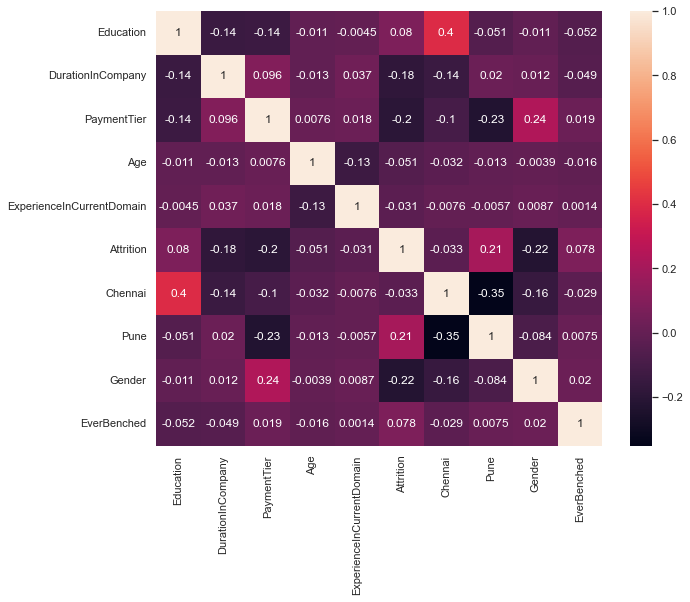

In [30]:
corr = data.corr()
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(corr,annot = True)


# FROM THE HEAT MAP


# PAYMENT TIER, DURATION IN COMPANY CORRELATE MOST TO TURNOVER

# EXPLORATORY DATA ANALYSIS


In [31]:
data.columns


Index(['Education', 'DurationInCompany', 'PaymentTier', 'Age',
       'ExperienceInCurrentDomain', 'Attrition', 'Chennai', 'Pune', 'Gender',
       'EverBenched'],
      dtype='object')

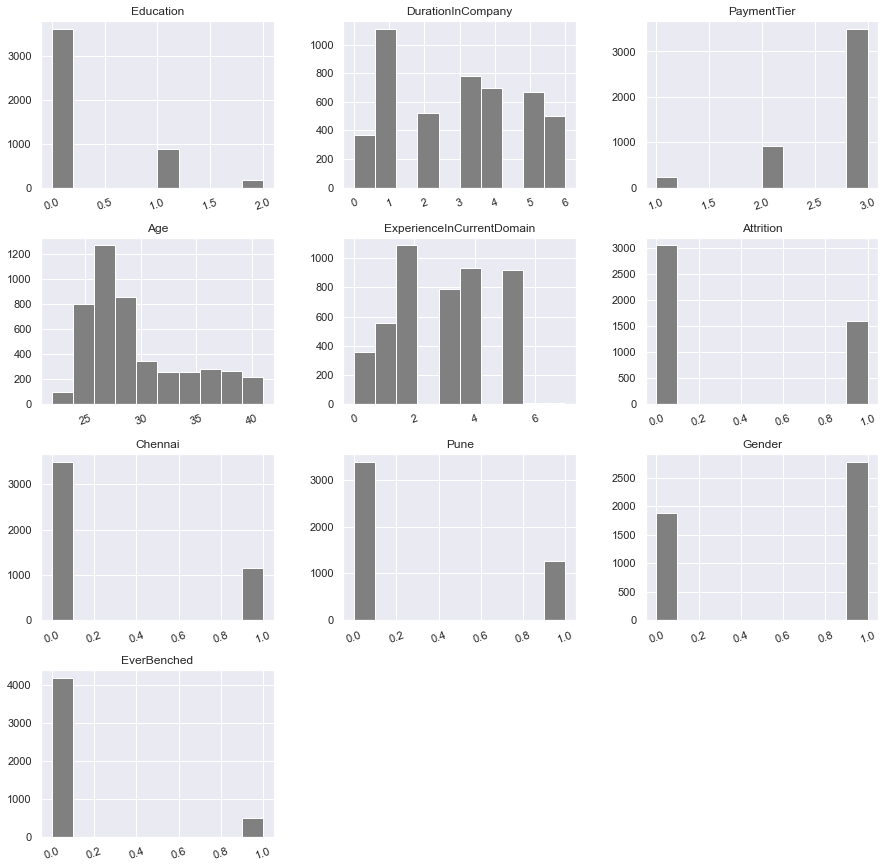

In [32]:
data.hist(xrot = 20,figsize = (15,15),color = "grey")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Attrition')

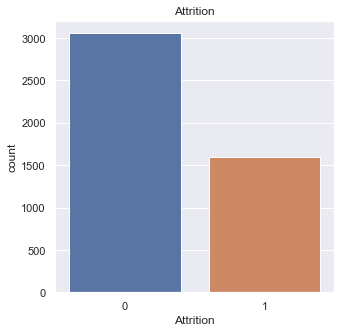

In [33]:
sns.countplot(data['Attrition'])
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('Attrition')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PaymentTier')

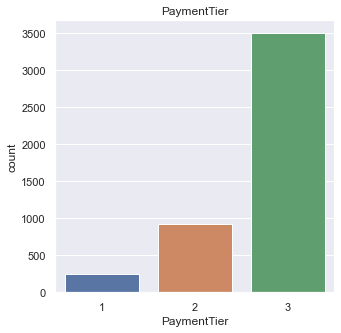

In [34]:
sns.countplot(data['PaymentTier'])
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('PaymentTier')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age')

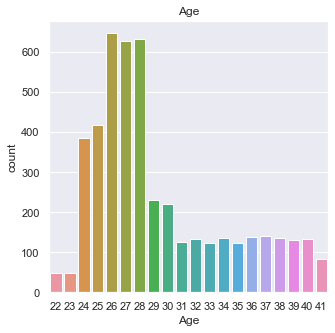

In [35]:
sns.countplot(data['Age'])
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('Age')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'ExperienceInCurrentDomain')

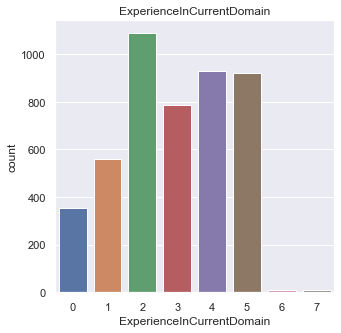

In [36]:
sns.countplot(data['ExperienceInCurrentDomain'])
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('ExperienceInCurrentDomain')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'EverBenched')

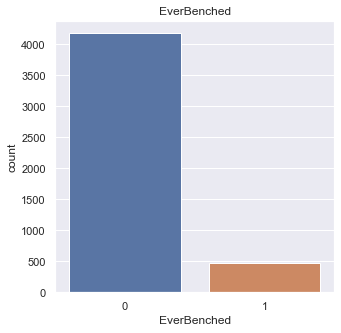

In [37]:
sns.countplot(data['EverBenched'])
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('EverBenched')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'City')

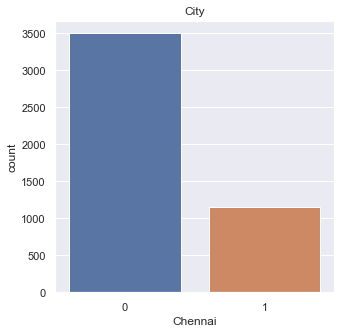

In [38]:
sns.countplot(data['Chennai'])
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('City')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'City')

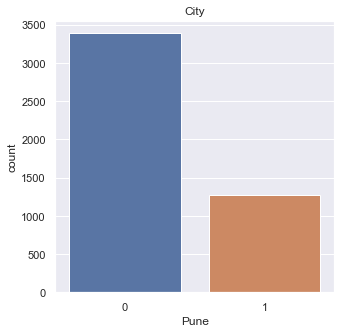

In [39]:
sns.countplot(data['Pune'])
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('City')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Education')

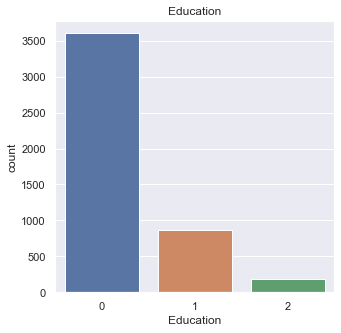

In [40]:
sns.countplot(data['Education'])
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('Education')

In [41]:
X=data.drop(['Attrition'],axis=1)
y=data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)


# BUILDING MODELS

# 1.DECISION TREE ALGORITHM :


# USING STANDARD SCALAR METHOD

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop('Attrition',axis = 1))
scaled_features = scaler.transform(data.drop('Attrition',axis = 1))
data_scaled = pd.DataFrame(scaled_features,columns = 
                         ['Education','DurationInCompany','PaymentTier', 'Age',
                         'ExperienceInCurrentDomain','New Delhi','Pune', 'Gender', 'EverBenched'])

In [43]:
data_scaled.head()

,Education,DurationInCompany,PaymentTier,Age,ExperienceInCurrentDomain,New Delhi,Pune,Gender,EverBenched
0,-0.507731,-1.039638,0.537503,0.954645,-1.864901,-0.575282,-0.612041,0.821551,-0.338365
1,-0.507731,1.107233,-3.025177,-0.288732,0.060554,-0.575282,1.633878,-1.217210,-0.338365
2,-0.507731,0.570515,0.537503,1.783563,-0.581264,1.738277,-0.612041,-1.217210,-0.338365
3,1.411418,-0.502921,0.537503,-0.495961,1.344191,-0.575282,-0.612041,0.821551,-0.338365
4,1.411418,-1.039638,0.537503,-1.117650,-0.581264,-0.575282,1.633878,0.821551,2.955387


# FITTING THE MODEL:

In [44]:
from sklearn.model_selection import train_test_split
X = data_scaled
y = data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
model = DecisionTreeClassifier(random_state = 1,class_weight="balanced",
                               min_samples_leaf =100)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

Text(0.5, 48.5, 'Predicted label')

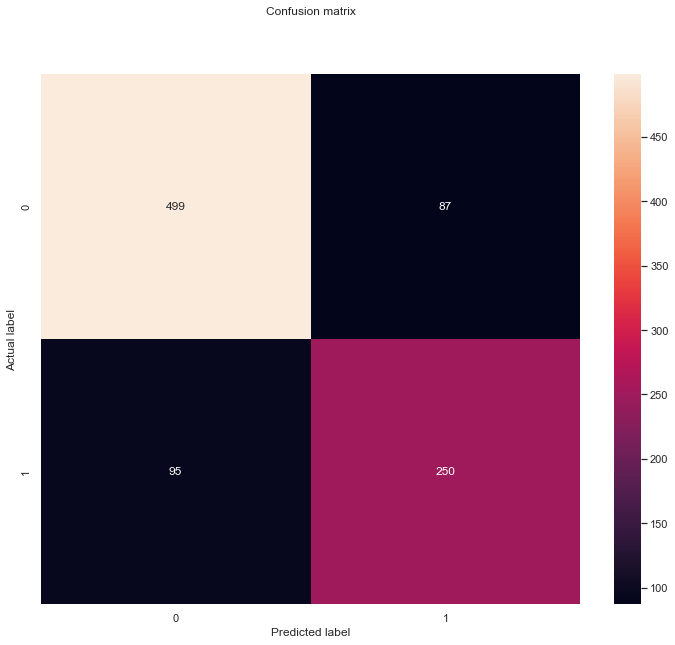

In [46]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,fmt='g')
sns.set(rc={'figure.figsize':(2,2)})
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# CONFUSION MATRIX FOR THE PREDICTIONS:

# PERFORMANCE PREDICTION OF THE MODEL

In [47]:
model.score(X_train,y_train)


0.7984954325631382

In [48]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("Classification report")
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.8045112781954887
Precision: 0.7418397626112759
Recall: 0.7246376811594203
F1 Score: 0.7331378299120234
Classification report
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       586
           1       0.74      0.72      0.73       345

    accuracy                           0.80       931
   macro avg       0.79      0.79      0.79       931
weighted avg       0.80      0.80      0.80       931



# ACCURACY WHILE USING DECISION TREE CLASSIFIER IS 80

# HYPERPARAMETERS TUNING USING GRID SEARCH

In [49]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

from sklearn.model_selection import GridSearchCV
grid_search_dt= GridSearchCV(estimator=model,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =2, verbose=1)

grid_search_dt.fit(X_train,y_train)

best_parameters_dt= grid_search_dt.best_params_
print(best_parameters_dt)

grid_search_dt.best_score_

clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 25, min_samples_leaf= 1, min_samples_split= 2, splitter ='best')
clf.fit(X_train,y_train)

ac_clf= clf.score(X_test ,y_test)
ac_clf

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 9, 'min_samples_split': 2, 'splitter': 'best'}


0.8141783029001074

# 2.RANDOM FOREST CLASSIFIER

In [50]:
from sklearn.ensemble import RandomForestClassifier 


In [51]:
m=RandomForestClassifier()

# FITTING THE MODEL:

In [52]:
m.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
y=m.predict(X_test)

In [54]:
m.predict_proba(X_test)

array([[1.        , 0.        ],
       [0.99166667, 0.00833333],
       [0.84220922, 0.15779078],
       ...,
       [0.73615744, 0.26384256],
       [0.93533333, 0.06466667],
       [0.97477273, 0.02522727]])

# PERFORMANCE PREDICTION OF THE MODEL:

In [55]:
accuracy_score(y_test,y)

0.8281417830290011

In [56]:
m.score(X_train,y_train)

0.929876410531972

In [57]:
confusion_matrix(y_test,y)

array([[530,  56],
       [104, 241]], dtype=int64)

In [58]:
z=classification_report(y_test,y)
print(z)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       586
           1       0.81      0.70      0.75       345

    accuracy                           0.83       931
   macro avg       0.82      0.80      0.81       931
weighted avg       0.83      0.83      0.83       931



# ACCURACY WHILE USING RANDOM FOREST CLASSIFIERIS  83

# USING GRID SEARCHCV

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid_search_rfc = GridSearchCV(estimator=m, param_grid=param_grid, cv= 5)
grid_search_rfc.fit(X_train, y_train)

best_parameters_rfc= grid_search_rfc.best_params_
print(best_parameters_rfc)

grid_search_rfc.best_score_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}


0.8527722450746914

# ACCURACY AFTER USING GRID SEARCH IS 85

# 3.SUPPORT VECTOR MACHINE

In [61]:
from sklearn.svm import SVC


In [62]:
svm=SVC(probability=True)

# FITTING THE MODEL:

In [63]:
svm.fit(X_train,y_train)

SVC(probability=True)

In [64]:
sv=svm.predict(X_test)

In [65]:
svm.predict_proba(X_test)

array([[0.86349055, 0.13650945],
       [0.8353233 , 0.1646767 ],
       [0.83449448, 0.16550552],
       ...,
       [0.87171634, 0.12828366],
       [0.84835711, 0.15164289],
       [0.85784479, 0.14215521]])

# PERFORMANCE PREDICTION OF THE MODEL:

In [66]:
accuracy_score(y_test,sv)

0.8249194414607949

In [67]:
confusion_matrix(y_test,sv)

array([[562,  24],
       [139, 206]], dtype=int64)

In [68]:
z=classification_report(y_test,sv)
print(z)

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       586
           1       0.90      0.60      0.72       345

    accuracy                           0.82       931
   macro avg       0.85      0.78      0.79       931
weighted avg       0.84      0.82      0.82       931



# ACCURACY WHILE USING SUPPORT VECTOR MACHINE IS 63

# 4.KNEIGHBORS CLASSIFIERS

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
kn=KNeighborsClassifier()

# FITTING THE MODEL:

In [71]:
kn.fit(X_train,y_train)


KNeighborsClassifier()

In [72]:
h=kn.predict(X_test)

In [73]:
kn.predict_proba(X_test)

array([[1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       ...,
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2]])

# PERFORMANCE PREDICTION OF THE MODEL:

In [74]:
accuracy_score(y_test,h)

0.790547798066595

In [75]:
kn.score(X_train,y_train)

0.8567974207415368

In [76]:
confusion_matrix(y_test,h)

array([[523,  63],
       [132, 213]], dtype=int64)

In [77]:
k=classification_report(y_test,h)
print(k)

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       586
           1       0.77      0.62      0.69       345

    accuracy                           0.79       931
   macro avg       0.79      0.75      0.76       931
weighted avg       0.79      0.79      0.78       931



# ACCURACY WHILE USING KNN IS 76

# 5.LOGISTIC REGRESSION

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
lr=LogisticRegression()

# FITTING THE MODEL:

In [80]:
lr.fit(X_train,y_train)


LogisticRegression()

In [81]:
l=lr.predict(X_test)

In [82]:
lr.predict_proba(X_test)

array([[0.75902217, 0.24097783],
       [0.89076393, 0.10923607],
       [0.90089198, 0.09910802],
       ...,
       [0.85342665, 0.14657335],
       [0.72750667, 0.27249333],
       [0.18417494, 0.81582506]])

# PERFORMANCE PREDICTION OF THE MODEL:

In [83]:
accuracy_score(y_test,l)


0.7099892588614393

In [84]:
confusion_matrix(y_test,l)

array([[530,  56],
       [214, 131]], dtype=int64)

In [85]:
j=classification_report(y_test,l)
print(j)

              precision    recall  f1-score   support

           0       0.71      0.90      0.80       586
           1       0.70      0.38      0.49       345

    accuracy                           0.71       931
   macro avg       0.71      0.64      0.64       931
weighted avg       0.71      0.71      0.68       931



# ACCURACY WHILE USING LOGISTIC REGRESSION 71


# SHOWING THE IMPORTANCE OF EACH AND EVERY CATEGORIES:


In [86]:
feature_importances = m.feature_importances_
feature_list = list(X)
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])
relative_importances.sort_values(by="importance", ascending=False)

,importance
DurationInCompany,0.329872
Age,0.163018
Education,0.104988
PaymentTier,0.097914
Gender,0.089942
ExperienceInCurrentDomain,0.084737
Pune,0.081686
New Delhi,0.028566
EverBenched,0.019276


# CONCLUSION:

# CATEGORIES THAT CONTRIBUTE THE MOST TO WHETHER THE EMPLOYEE IS GOINT TURNOVER:

# 1.   DurationInCompany

# 2.   PaymentTier

# 3.   Office in Pune

# Graphical representation of conclusion

<AxesSubplot:xlabel='Pune', ylabel='Attrition'>

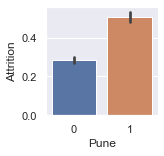

In [87]:
sns.barplot(x=data['Pune'],y=data['Attrition'])

<AxesSubplot:xlabel='DurationInCompany', ylabel='Attrition'>

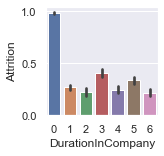

In [88]:
sns.barplot(x=data['DurationInCompany'],y=data['Attrition'])

<AxesSubplot:xlabel='PaymentTier', ylabel='Attrition'>

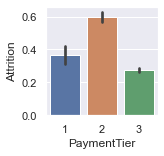

In [89]:
sns.barplot(x=data['PaymentTier'],y=data['Attrition'])

# HOW THE PROBLEM OF EMPLOYEE TURNOVER CAN BE RECTIFIED:

# 1.The higher the payment rate

# 2.Higher the Duration in company

# 3.Comfortable environment for the employees

# MODEL

# Random Forest Classifier gives the highest accuracy for the model= 85

# INTEGRATING POWER BI VISUAL WITH PYTHON 

In [90]:
!pip install powerbiclient

In [91]:
from powerbiclient import Report,models

In [92]:
import powerbiclient

In [94]:
from powerbiclient.authentication import DeviceCodeLoginAuthentication
dva=DeviceCodeLoginAuthentication()

Performing interactive authentication. Please follow the instructions on the terminal.
 To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code I7SH65MRH to authenticate.
You have logged in.
Interactive authentication successfully completed.


In [95]:
gid="ba46ff26-48cd-415b-b66b-92c66e048c88"

In [96]:
rid="ba3a9c1a-7e3a-4f57-89c0-4e34c2624869"

In [97]:
report=Report(group_id=gid,report_id=rid, auth=dva)

In [98]:
report

Report()

# POWER BI VISUALS OF THE MODEL